<a href="https://colab.research.google.com/github/GraceFad/Introduction-to-A-B-Testing---Udacity-A-B-Test-Example/blob/main/Udacity_A_B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

##Overview 
The Udacity A/B test is a split test carried out to check the introduction of  a new feature. Before the new feature, Udacity had the option for users to choose either to "Start a free trial" or "Access course materials". The new feature introduced asked the users how many hours they had to commit to the course. User who had less than 5 hours to commit per day, were automatically redirected to "Access course materials".

Before we begin the analysis, we have to select the invariant metric and the evaluation metric. 

The invariant metric will be used in this case as a sanity check. The sanity check is to verify the experiment is done properly, that is, the size of the control group and the treatment group is the same, inorder to prevent creating a size bias between the two groups.

The evaluation metric, is used to check the performance of the test. And in this case, we will be using the converstion rate of enrolled users to paying users. 

For the CTR metric, our null hypothesis is:

Hnull: d = 0

Halternative : d not equals 0


For the evaluation metric:

Hnull : d = 0 

Halt : d > 0 

where,

d is the difference between the metric of the control group and the test group.


Data is available at https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

---------

###Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import statsmodels.stats.api as sms
import scipy.stats as st


In [ ]:
#load datasets and join to form a dataset
control = pd.read_csv('Final Project Results - Control.csv')
control = control.dropna()
test = pd.read_csv('Final Project Results - Experiment.csv')
test = test.dropna()
data = pd.merge(control,test,on= 'Date', how='inner')

index = ["Page_views","Clicks","Enrollments","Payments"]

new_data = {"Control": pd.Series([data.Pageviews_x.sum(),data.Clicks_x.sum(),
                                 data.Enrollments_x.sum(),data.Payments_x.sum()],
                                  index = index),
            "Test": pd.Series([data.Pageviews_y.sum(),data.Clicks_y.sum(),
                                 data.Enrollments_y.sum(),data.Payments_y.sum()],
                                  index = index)}

df=pd.DataFrame(new_data)
df.head().T

,Page_views,Clicks,Enrollments,Payments
Control,212163.0,17293.0,3785.0,2033.0
Test,211362.0,17260.0,3423.0,1945.0


In [ ]:
#bring out all parameters for the control and test group
clicks_control = data.Clicks_x.sum()
pageviews_control = data.Pageviews_x.sum()
enrollments_control = data.Enrollments_x.sum()
payments_control = data.Payments_x.sum()


clicks_test = data.Clicks_y.sum()
pageviews_test = data.Pageviews_y.sum()
enrollments_test = data.Enrollments_y.sum()
payments_test = data.Payments_y.sum()

The control and group sample dataset had about 14 rows missing data for the enrollments and payments column. This is quite understandable as the test ran for the period of 14 days for the 14-day trial. 

The missing rows were dropped inorder not to affect the mean taken from the dataset. 

###Functions


In [ ]:
#for z test
def get_z_test(confidence_level,p_control, p_test, p, n_control, n_test):
  print("For a confidence level of", confidence_level,'%')
  alpha = 1 - (confidence_level/100)
  z_score = st.norm.ppf(1 - alpha)
  print('The z score is', z_score)

  z_value = (p_test - p_control) / math.sqrt(p * (1-p)* (1/n_control + 1/n_test))
  print('The z value is ', z_value) 

  if z_value < z_score: 
    print('Do Not Reject Null')

  else:
    print('Reject Null')

In [ ]:
#for t test 
from scipy import stats
def get_t_test(confidence_level, x1, x2, s1, s2, n1, n2):
  t_value = x1 - x2/ math.sqrt((s1/n1) + (s2/n2))
  print(t_value)

  alpha = 1 - (confidence_level/100)

  if n1> n2:
    n = n2
    t_stat = stats.t.ppf(1-alpha,n-1)
    print('The t statistic is ', t_stat) 
  else:
    n = n1
    t_stat = stats.t.ppf(1-alpha,n-1)
    print('The t statistic is ', t_stat)

  if t_value > t_stat or t_value < -t_stat: 
    print('Reject Null')

  else:
    print('Do Not Reject Null')

  p1_value= stats.t.sf(np.abs(t_value), n-1)
  print('Using the p value for comparison:', np.round(p_value,6))

  if p1_value > alpha or  p1_value < -alpha:
    print('Do Not Reject Null')
  
  else:
    print('Reject Null')


###Sanity Check Using the Click Through Rate Metric.

In [ ]:
clicks_control = data.Clicks_x.sum()
pageviews_control = data.Pageviews_x.sum()
enrollments_control = data.Enrollments_x.sum()
payments_control = data.Payments_x.sum()


clicks_test = data.Clicks_y.sum()
pageviews_test = data.Pageviews_y.sum()
enrollments_test = data.Enrollments_y.sum()
payments_test = data.Payments_y.sum()


ctr_control = clicks_control/pageviews_control
ctr_test = clicks_test/pageviews_test
ctr_diff = ctr_control - ctr_test

print(ctr_control,ctr_test)

pooled_prob = (clicks_control + clicks_test) / (pageviews_control + pageviews_test)
se_pooled_prob = math.sqrt(pooled_prob * (1- pooled_prob)* ((1/pageviews_control)+(1/pageviews_test)))
#to check the significance of statistical difference

print('For a confidence interval between',round(-1.96*se_pooled_prob, 5), "and", round(1.96*se_pooled_prob, 5))
if ctr_diff > (1.96*se_pooled_prob) or ctr_diff < (-1.96*se_pooled_prob):
  print('Reject Null')

else:
  print('Do not Reject Null')

0.0815080857642473 0.08166084726677454
For a confidence interval between -0.00165 and 0.00165
Do not Reject Null


Text(0.5, 1.0, 'Visualization of Confidence Interval')

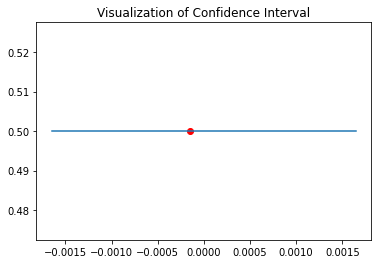

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
CIx = [(-1.96*se_pooled_prob), (1.96*se_pooled_prob)]
CIy = [0.5,0.5]

CTRx = [ctr_diff]
CTRy= [0.5]

plt.plot(CIx,CIy)
plt.scatter(CTRx, CTRy, color = 'red')
plt.title('Visualization of Confidence Interval')

Our significance test shows that both experiment groups would serve the purpose.

The 95% confidence interval defines a range of values that you can be 95% certain contains the population mean

We are 95% confident that the difference between the click through rate of the entire population of the test and control group is between  -0.00165 and +0.00165.

###Evaluation Metric: Conversion of users that enrolled to users that paid. 

In [ ]:
# Z test for enrolled users that converted to paying users with a 95% confidence level
confidence_level = 95
conv_control = df['Control']['Payments']/ df['Control']['Enrollments']
conv_test = df['Test']['Payments']/ df['Test']['Enrollments']
conv_prop= (df['Control']['Payments'] + df['Test']['Payments'])/ (df['Control']['Enrollments'] + df['Test']['Enrollments'])
enrollments_control = df['Control']['Enrollments']
enrollments_test = df['Test']['Enrollments']

get_z_test(confidence_level, conv_control, conv_test, conv_prop, enrollments_control, enrollments_test)


For a confidence level of 95 %
The z score is 1.6448536269514722
The z value is  2.65092819003226
Reject Null


In [ ]:
# p value for the z test
z_value = 2.65
z_cal=st.norm.cdf(z_value)
p_value=(1-z_cal)*2

print('For the z_score of 1.96, the p value is', p_value)

For the z_score of 1.96, the p value is 0.008049177085516668


In [ ]:
# t test for enrolled users that converted to paying users with a 95% confidence level
data = pd.merge(control,test,on= 'Date', how='inner')
data['con_control'] = data.Payments_x/data.Enrollments_x
data['con_test'] = data.Payments_y/data.Enrollments_y

from scipy.stats import ttest_ind
ttest_ind(data.con_control, data.con_test)

Ttest_indResult(statistic=-1.0081408912731535, pvalue=0.3188989662061842)

Here, there is a significant difference between the p-values of the t test and the z test, which is expected from the difference in the n values used in both tests. 

In [ ]:
#Other way to calculate the t_test......even though it is not suitable in this regard
data = pd.merge(control,test,on= 'Date', how='inner')
data['con_control'] = data.Payments_x/data.Enrollments_x
data['con_test'] = data.Payments_y/data.Enrollments_y

x1 = data.con_control.mean()
x2 = data.con_test.mean()

n1 = data.con_control.count()
n2 = data.con_test.count()

s1 = data.con_control.std()
s2 = data.con_test.std()

get_t_test(90, x1,x2,s1,s2,n1,n2)

-5.296244866328485
The t statistic is  1.3212367416133617
Reject Null
Using the p value for comparison: 0.008049
Reject Null


The p-value is not greater than the alpha value, 0.05 for the t test, hence we Reject Null hypothesis.

###Conclusion
From the result of the hypothesis test of both test and control group, it is safe to say that we REJECT the null hypothesis that states there is no difference between the rate of users that enrolled and converted to paying users for the test group and the control group. 
